# Project 2: "Diabetes Patients"

# About Dataset

In [2]:
#loading the required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [4]:
#Loading dataset

In [5]:
data = pd.read_csv('diabetes.csv')
print("Successfully Imported Data")
data.head(8)

Successfully Imported Data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
print(data.shape)

(768, 9)


In [8]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
print(data[data["Pregnancies"]==0].shape[0])
print(data[data["Glucose"]==0].shape[0])
print(data[data["BloodPressure"]==0].shape[0])
print(data[data["SkinThickness"]==0].shape[0])
print(data[data["Insulin"]==0].shape[0])
print(data[data["BMI"]==0].shape[0])
print(data[data["DiabetesPedigreeFunction"]==0].shape[0])
print(data[data["Age"]==0].shape[0])

111
5
35
227
374
11
0
0


In [10]:
#finding null Values

In [11]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
#Total number of diabetic and non-diabetic patients

0    500
1    268
Name: Outcome, dtype: int64


Text(0, 0.5, 'Count')

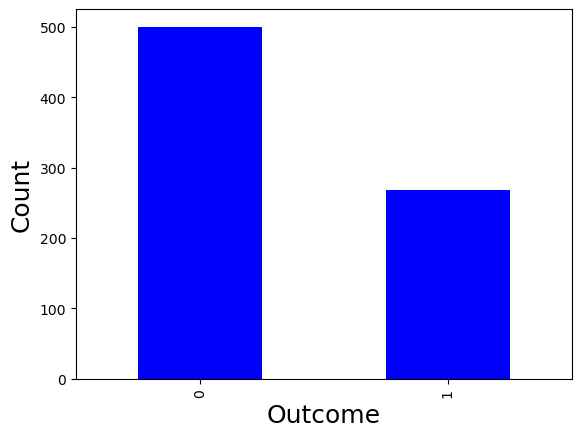

In [14]:
data['Outcome'].value_counts().plot(kind = 'bar', color = 'blue')
print(data.Outcome.value_counts())
plt.xlabel('Outcome',fontsize=18)
plt.ylabel('Count',fontsize=18)

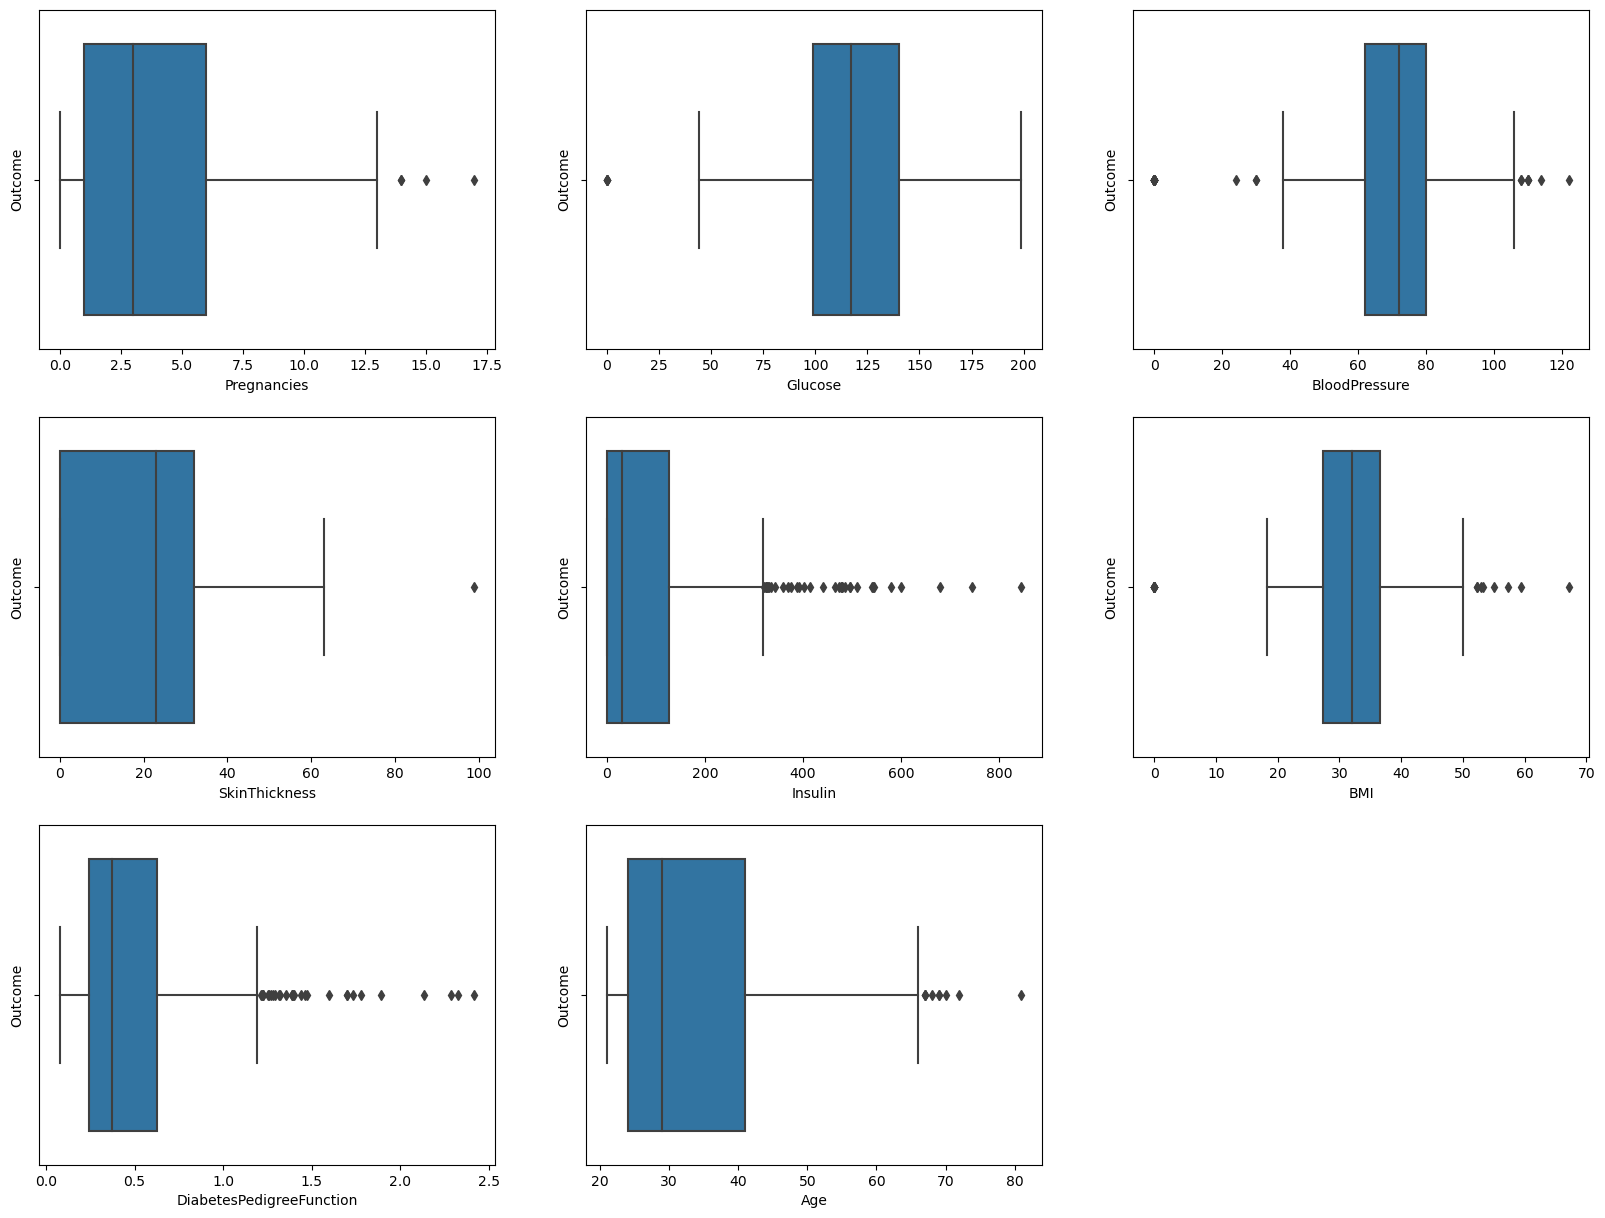

In [15]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=8):
        plt.subplot(3,3,plotnumber)
        sns.boxplot(x=i,data=data,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

In [16]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].median())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].
median())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].
median())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

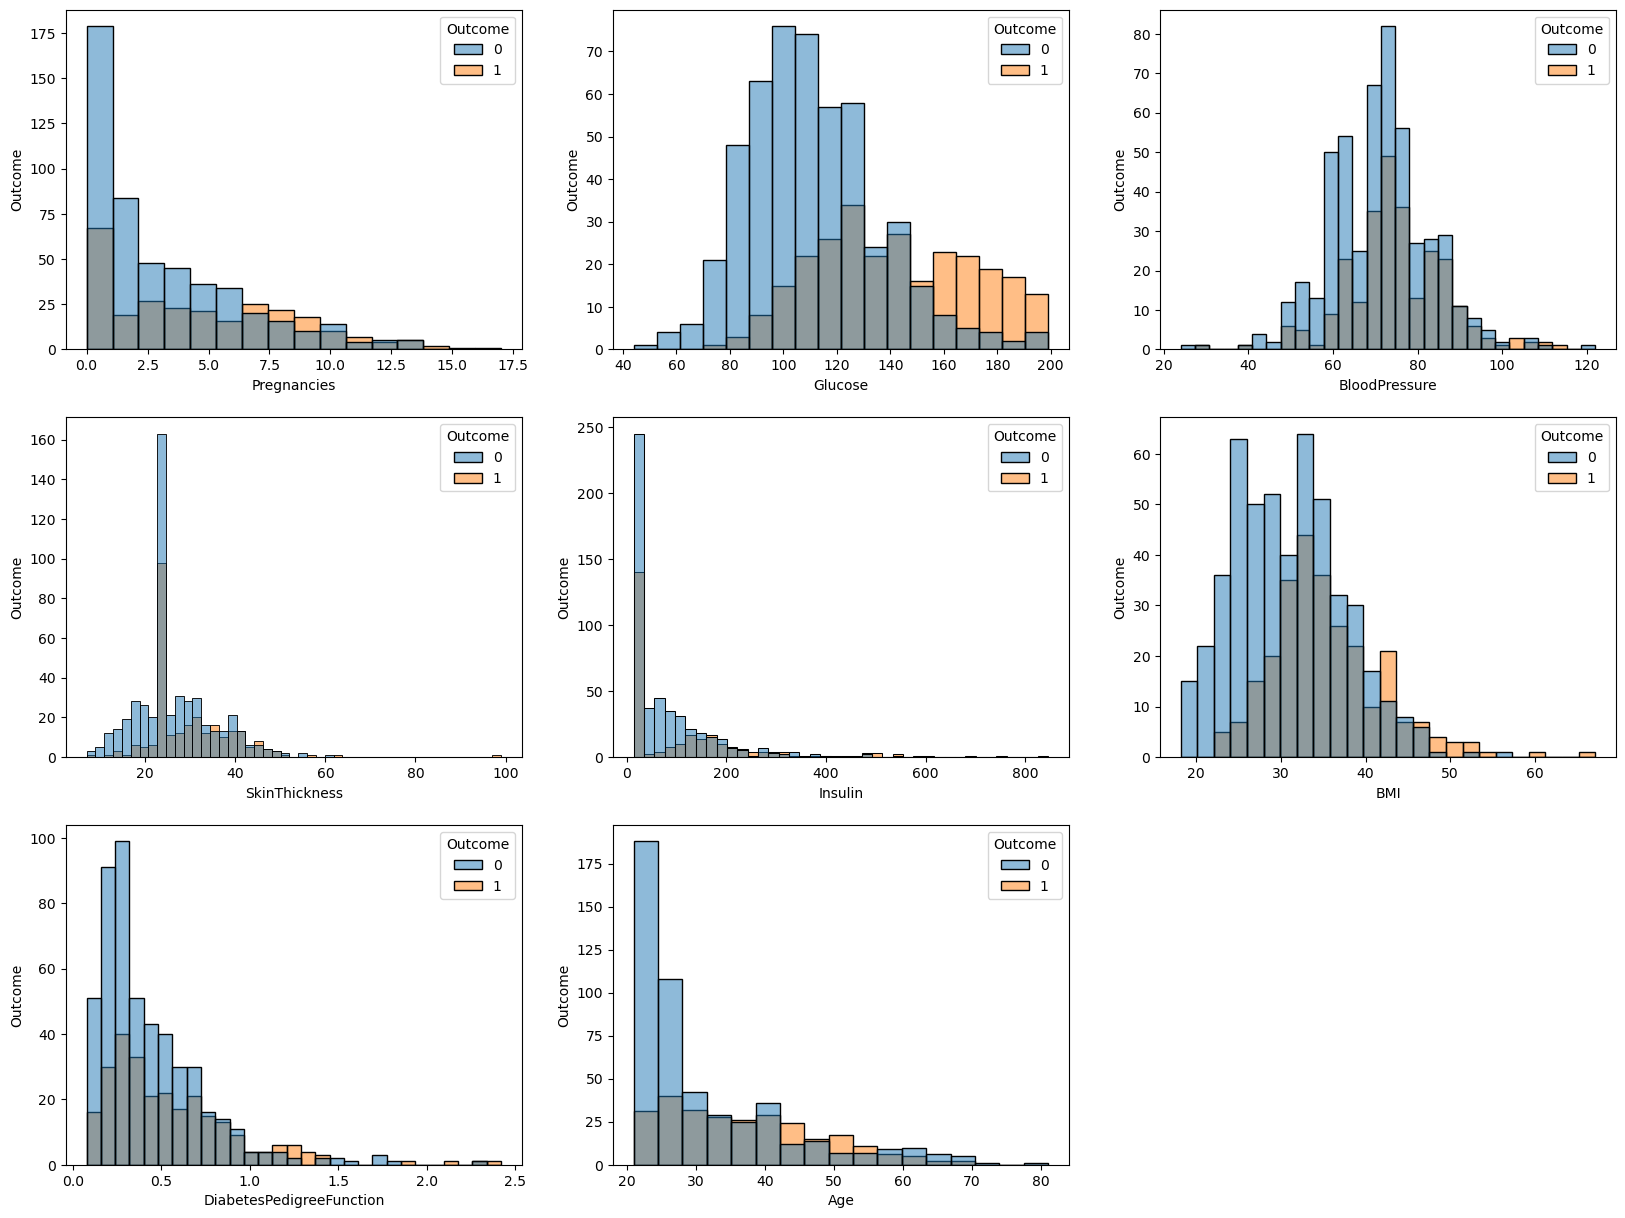

In [17]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=8):
        plt.subplot(3,3,plotnumber)
        sns.histplot(x=i,data=data,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1


In [18]:
data.Glucose.value_counts()

99     17
100    17
117    16
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 135, dtype: int64

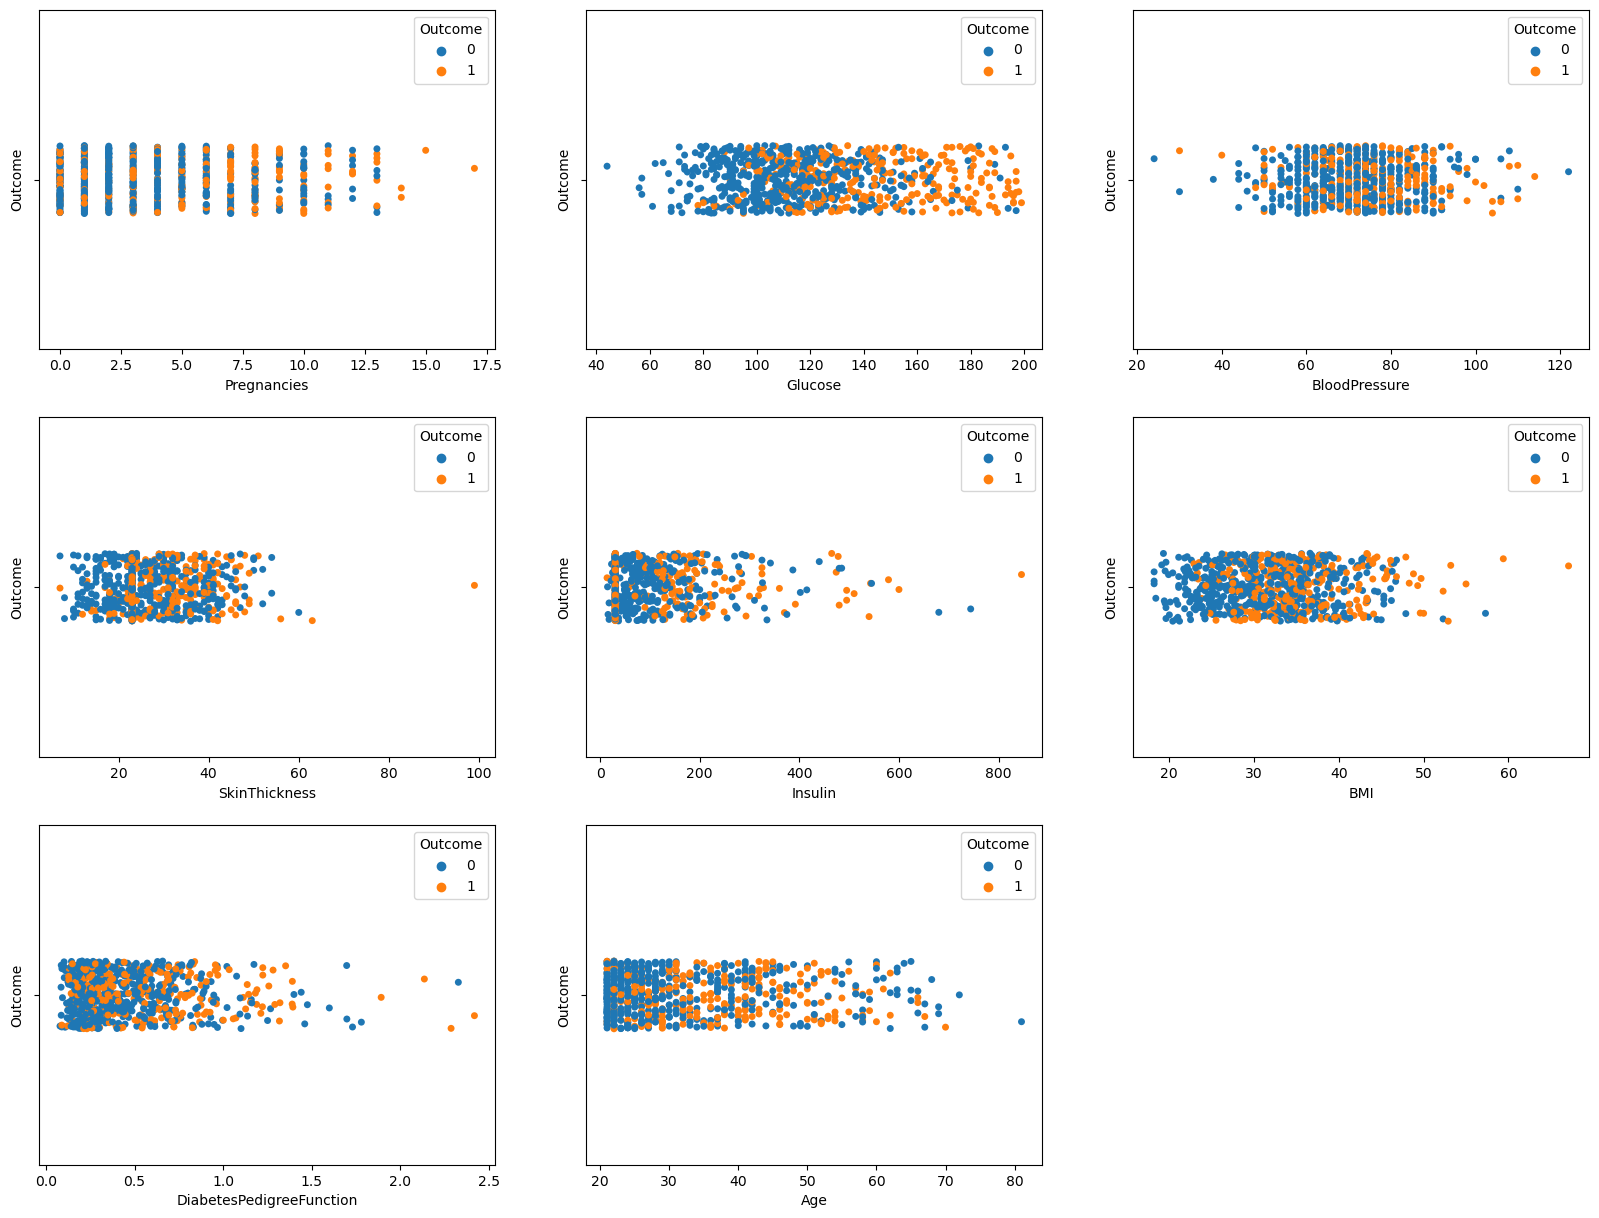

In [19]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=8):
        plt.subplot(3,3,plotnumber)
        sns.stripplot(x=i,data=data,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

In [20]:
from sklearn.preprocessing import MinMaxScaler
temp1=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
scaling=MinMaxScaler()
data.loc[:,temp1]=scaling.fit_transform(data.loc[:,temp1])

In [21]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

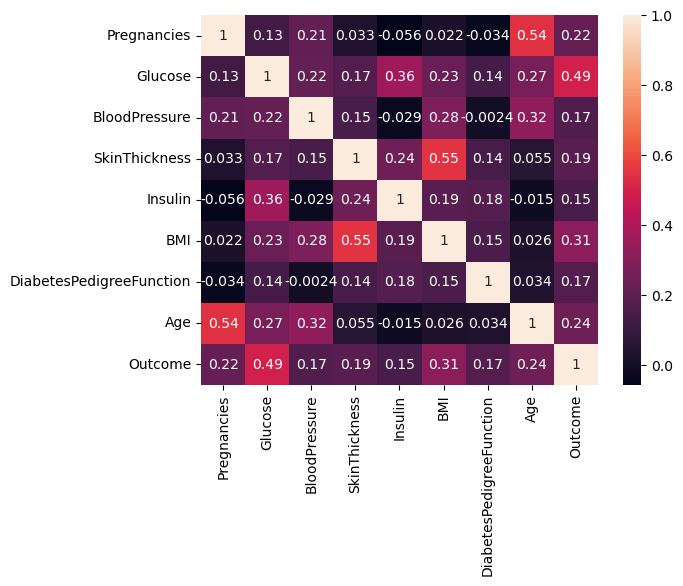

In [22]:
heat=data.corr()
sns.heatmap(heat,annot=True)

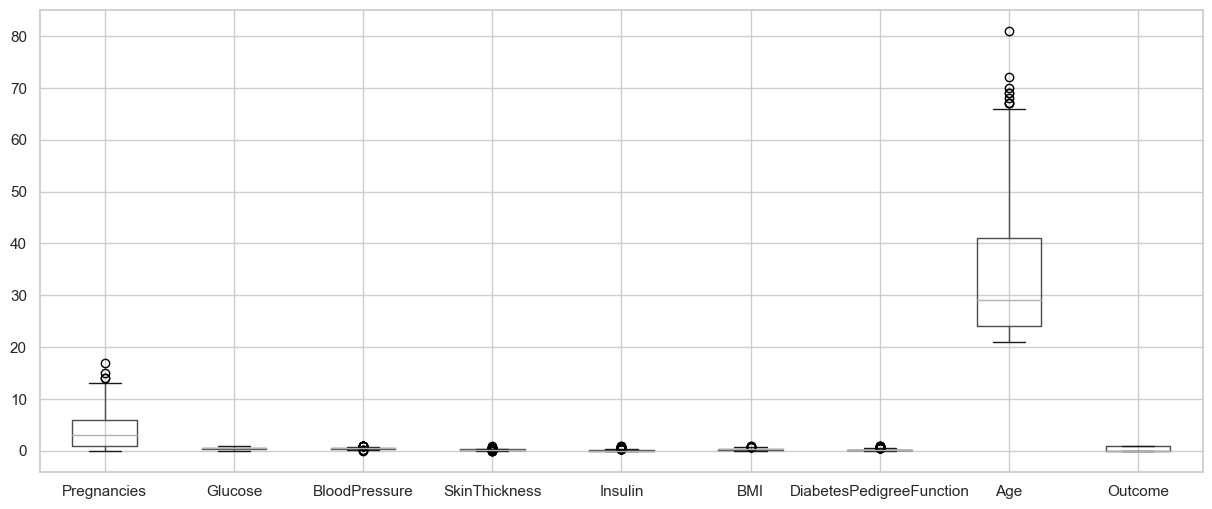

In [23]:
sns.set(style='whitegrid')
data.boxplot(figsize=(15,6))
plt.show()

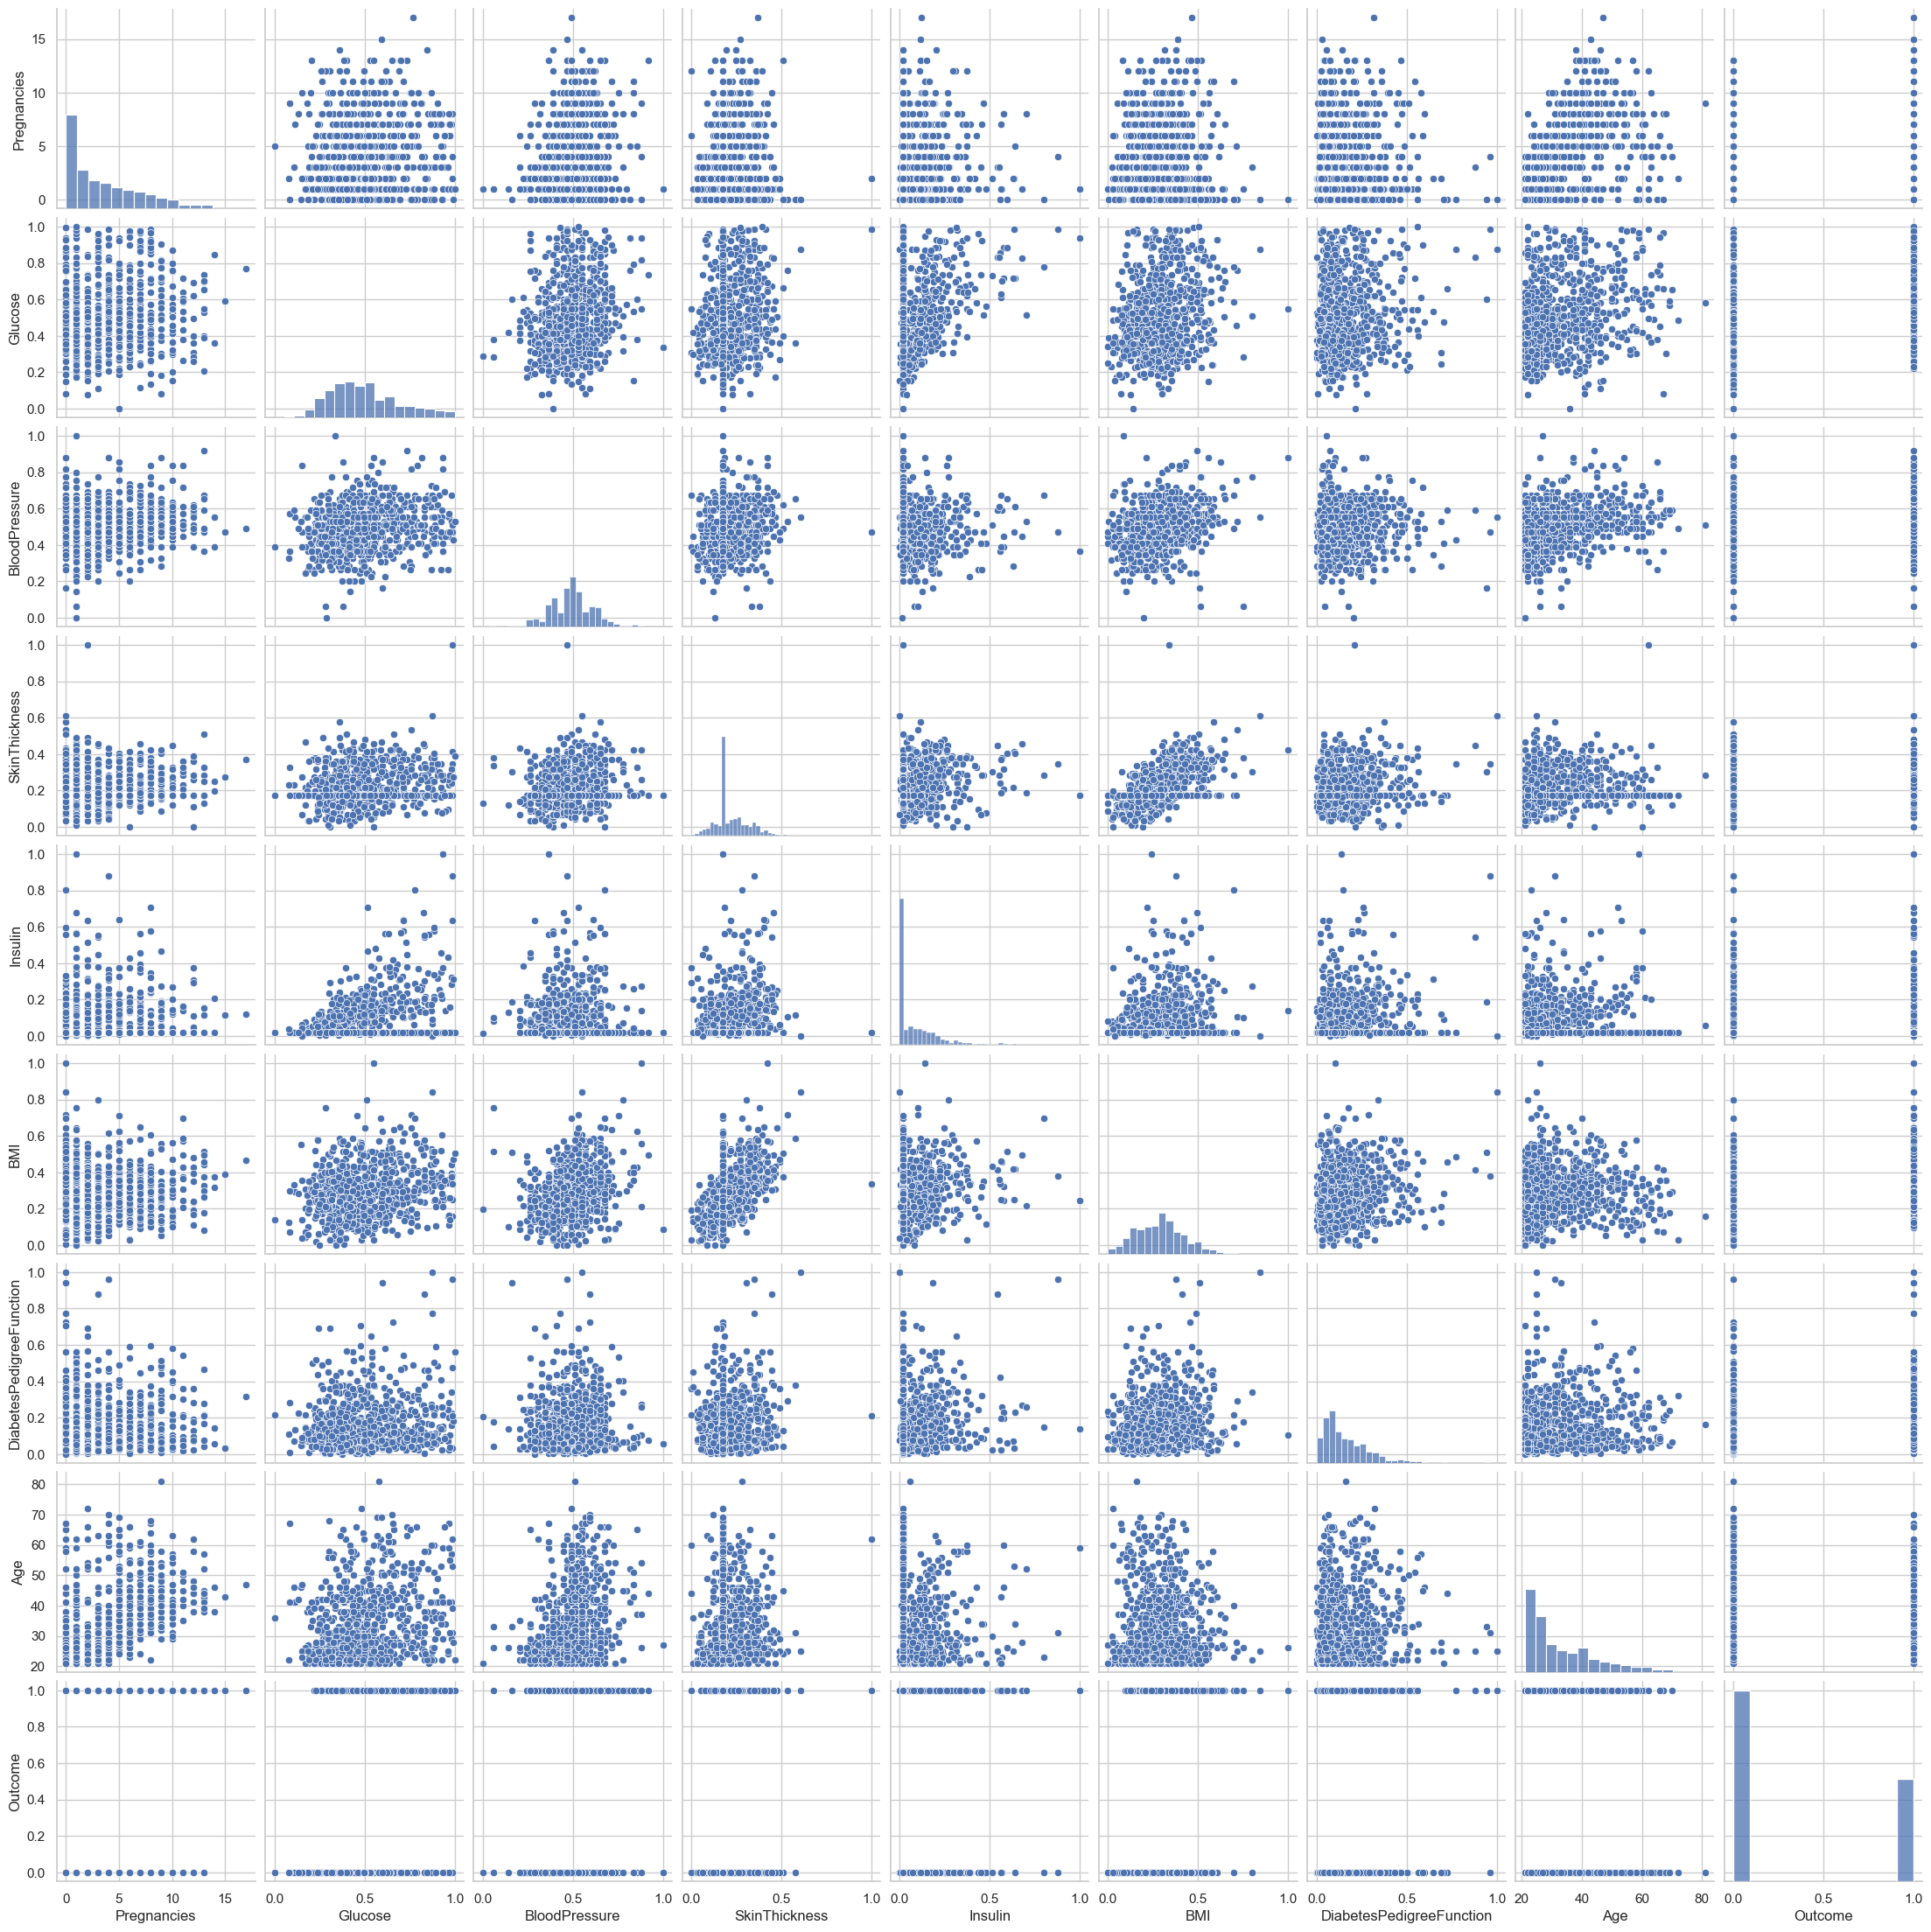

In [26]:
sns.pairplot(data)

In [24]:
#Lets extract features and targets
X = data.drop(columns = ['Outcome'])
Y = data['Outcome']
print("Features Extraction Successful")

Features Extraction Successful


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.10582852 0.2470899  0.09499423 0.08274902 0.07750131 0.1395464
 0.1162151  0.13607552]


In [26]:
#Splitting Dataset

In [27]:
#get 'input' and 'target' columns
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [28]:
# Splitting data for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

# Logistic Regression

Accuracy: 77.20%
Accuracy: 76.62%


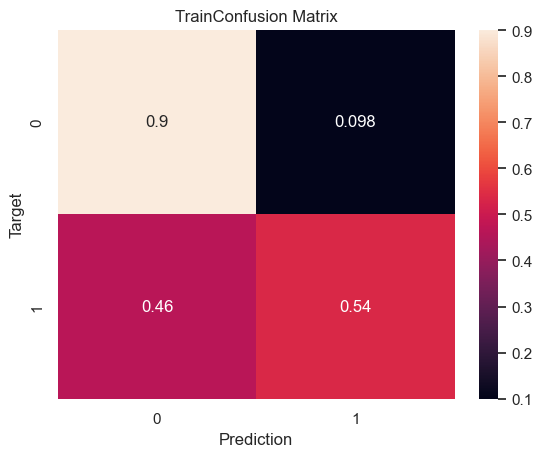

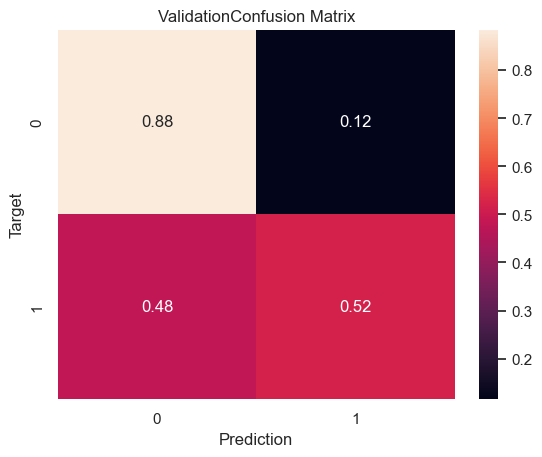

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, imputs, targets, name=''):
    preds = model.predict(imputs)  # Replace 'inputs' with 'imputs'
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{}Confusion Matrix'.format(name))
    
    return preds

#Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

#Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
model_2.score(X_train, y_train)

1.0

Accuracy: 100.00%
Accuracy: 72.73%


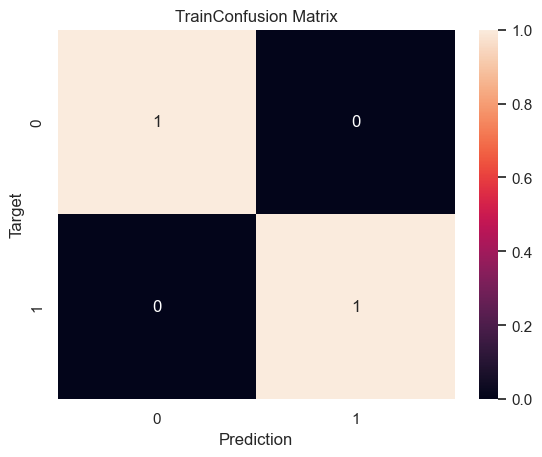

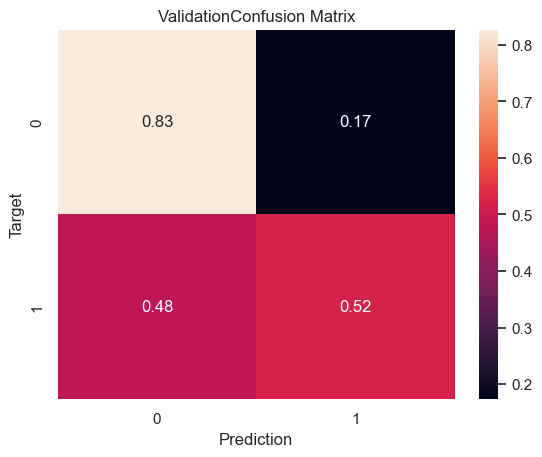

In [33]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs) 
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{}Confusion Matrix'.format(name))
    
    return preds

#Predict and plot on the training data
train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

#Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

In [34]:
# Hyperparameter Tuning of Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 300],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

#Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

#Print the result
print('Training Accuracy:', train_accuracy)
print('validation Accuracy:', val_accuracy)

Training Accuracy: 0.996742671009772
validation Accuracy: 0.7532467532467533


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Create the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

#Evaluation the model on the training and Validation data
train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

#Print the results
print('Training Accuracy:', train_accuracy)
print('validation Accuracy:', val_accuracy)

Training Accuracy: 1.0
validation Accuracy: 0.6753246753246753


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Corrected 'creterion' to 'criterion'
}



#Create the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

#fit the final model to the training data
best_model.fit(X_train, y_train)

#Evaluation the model on the training and Validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

#Print the results
print('Training Accuracy:', train_accuracy)
print('validation Accuracy:', val_accuracy)

Training Accuracy: 0.8534201954397395
validation Accuracy: 0.7207792207792207


# KNN

Training Accuracy: 0.7996742671009772
validation Accuracy: 0.6493506493506493


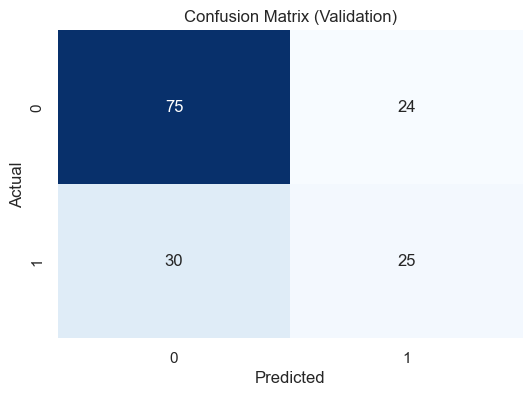

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#Split the data into training and validation sets
X_train, X_val, y_train, y_val, = train_test_split(X, y, test_size=0.2, random_state=42)

# create a KNN ckassifier( you can adjust the number of neighbors 'n_neighbors')
knn_model = KNeighborsClassifier(n_neighbors =5)

#fit the KNN model to the training data
knn_model.fit(X_train, y_train)

#Make prediction to the training data
y_train_pred = knn_model.predict(X_train)

#Make prediction on the validation data
y_val_pred =knn_model.predict(X_val)

#calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

#Print the results
print('Training Accuracy:', train_accuracy)
print('validation Accuracy:', val_accuracy)

#create a confusion matrix for validation data
confusion = confusion_matrix(y_val, y_val_pred)

# plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion, annot=True, fmt= 'd', cmap= 'Blues', cbar =False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Define the hyperparameter GRID to Search
param_grid= {
    'n_neighbors':[1, 3, 5, 7, 9] #Adjusr the number of neighbors to explore
}

#Create the KNN classifier
knn_model = KNeighborsClassifier()

#Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

# get the best estimator with tuned hyperparameter
y_train_pred = best_model.predict(X_train)

# make prediction on the training data using the best model
y_val_pred = best_model.predict(X_val)

#calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy with the Best Hyperparameter:", train_accuracy)
print("validation Accuracy with the Best Hyperparameter:", val_accuracy)

Training Accuracy with the Best Hyperparameter: 0.8224755700325733
validation Accuracy with the Best Hyperparameter: 0.8441558441558441


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Split your data into training and validation sets
X_train, X_vat, y_train, y_val =train_test_split(X,y, test_size=0.2, random_state=42)

# create an instance of teh SVC model with a linear kernal
svm_model = SVC(kernel ='linear')

#fit the SVM model to the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# Support Vector Classifier

Training Accuracy: 0.7654723127035831
validation Accuracy: 0.7532467532467533


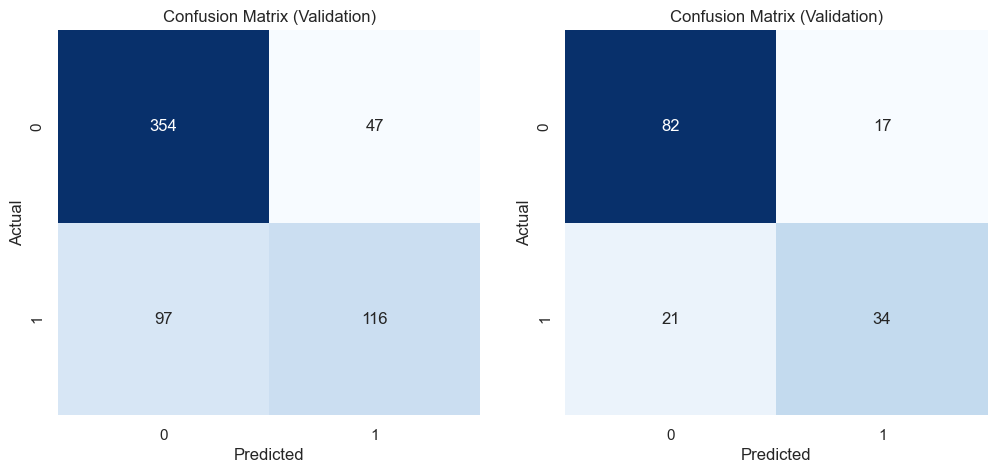

In [75]:
X_train, X_vat, y_train, y_val =train_test_split(X,y, test_size=0.2, random_state=42)

svm_model = SVC(kernel ='linear')

#fit the SVM model to the training data
svm_model.fit(X_train, y_train)

#Make prediction to the training data
y_train_pred = svm_model.predict(X_train)

#Make prediction on the validation data
y_val_pred =svm_model.predict(X_val)

#calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print('Training Accuracy:', train_accuracy)
print('validation Accuracy:', val_accuracy)

#create a confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)

#Plot the confusion Matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot =True, fmt= 'd', cmap= "Blues", cbar= False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot =True, fmt= 'd', cmap= "Blues", cbar= False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

# Gradient Boosting Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

#create a Gradient Boosting Classifier 
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the GBM model, to the training data
gbm_model.fit(X_train, y_train)

#Make prediction to the training data
y_train_pred_gbm = gbm_model.predict(X_train)

#Make prediction on the validation data
y_val_pred_gbm =gbm_model.predict(X_val)

#calculate the training and validation accuracies
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)
val_accuracy_gbm = accuracy_score(y_val, y_val_pred_gbm)

print('GBM Training Accuracy:', train_accuracy_gbm)
print('GBM Validation Accuracy:', val_accuracy_gbm)

GBM Training Accuracy: 0.9267100977198697
GBM Validation Accuracy: 0.7337662337662337


# XgBoost Classifier

In [45]:
from xgboost import XGBClassifier

#create a XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)  

# Fit the XGBoost model, to the training data
xgboost_model.fit(X_train, y_train)

#Make prediction to the training data
y_train_pred_xgboost = xgboost_model.predict(X_train)

#Make prediction on the validation data
y_val_pred_xgboost =xgboost_model.predict(X_val)

#calculate the training and validation accuracies
train_accuracy_xgboost = accuracy_score(y_train, y_train_pred_xgboost)
val_accuracy_xgboost = accuracy_score(y_val, y_val_pred_xgboost)

print('XGBoost Training Accuracy:', train_accuracy_xgboost)
print('XGBoost Validation Accuracy:', val_accuracy_xgboost)

XGBoost Training Accuracy: 0.9837133550488599
XGBoost Validation Accuracy: 0.7337662337662337


# Evaluate: XgBoost Classifier
Training Accuracy - 98.37%
Validadtion Accuracy - 73.37%